Introduction 

# 📊 Retail Profitability Analysis (Superstore Data)

This project analyzes retail transaction data from a fictional Superstore to identify profitability patterns, model outcomes, and support business decisions.

In this model Superstore.csv dataset is used throughout the course to perform data analytics and learn how to boost a company's profits. Python is used in order to clean, import, compute summary statistics, and visualize continuous and categorical data. The model also use linear regression modeling approach to illustrate the elements influencing the profitability of the business (Jo, Han-Shin, et al.). The model places a strong emphasis on following particular marking guidelines, interpreting the results for the client, and utilizing comments to support modeling decisions. 

In [1]:
# imorting library pandas 
import pandas as pd

In [2]:
#read in the data for dataset_Superstore
pd.read_csv("/kaggle/input/superstore-retail-profitability-dataset/dataset_Superstore.csv")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
0,3783,CA-2017-165204,13/11/2017,16/11/2017,Second Class,MN-17935,Michael Nguyen,1,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
1,7322,CA-2017-167626,03/09/2017,07/09/2017,Standard Class,MY-18295,Muhammed Yedwab,2,Corporate,2,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
2,1709,CA-2017-123491,30/10/2017,05/11/2017,Standard Class,JK-15205,Jamie Kunitz,3,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,7.420,2,0.0,3.7100,True
3,2586,CA-2015-121041,03/11/2015,10/11/2015,Standard Class,CS-12250,Chris Selesnick,4,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.608,2,0.2,2.1476,False
4,356,CA-2016-138520,08/04/2016,13/04/2016,Standard Class,JL-15505,Jeremy Lonsdale,5,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.260,2,0.0,3.7996,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2121,US-2017-168690,07/01/2017,13/01/2017,Standard Class,TS-21085,Thais Sissman,792,Consumer,1,...,2,Binders,7,Zipper Ring Binder Pockets,1849,2.808,3,0.7,-1.9656,False
9990,5274,US-2016-158309,26/11/2016,29/11/2016,First Class,PA-19060,Pete Armstrong,123,Home Office,3,...,2,Binders,7,Zipper Ring Binder Pockets,1849,3.744,4,0.7,-2.6208,False
9991,7312,CA-2015-162761,09/10/2015,13/10/2015,Standard Class,SC-20575,Sonia Cooley,626,Consumer,1,...,2,Binders,7,Zipper Ring Binder Pockets,1849,1.872,2,0.7,-1.3104,False
9992,2219,CA-2017-130841,28/07/2017,01/08/2017,Standard Class,MH-17620,Matt Hagelstein,767,Corporate,2,...,2,Binders,7,Zipper Ring Binder Pockets,1849,9.984,4,0.2,3.6192,False


In [3]:
# Assigning the dataframe to the dataset
Superstore = pd.read_csv("/kaggle/input/superstore-retail-profitability-dataset/dataset_Superstore.csv")

In [4]:
type(Superstore)

pandas.core.frame.DataFrame

Due to the large data set will use Superstore.head() to see the top 5 rows of the data. 

In [5]:
Superstore.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
0,3783,CA-2017-165204,13/11/2017,16/11/2017,Second Class,MN-17935,Michael Nguyen,1,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
1,7322,CA-2017-167626,03/09/2017,07/09/2017,Standard Class,MY-18295,Muhammed Yedwab,2,Corporate,2,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
2,1709,CA-2017-123491,30/10/2017,05/11/2017,Standard Class,JK-15205,Jamie Kunitz,3,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,7.420,2,0.0,3.7100,True
3,2586,CA-2015-121041,03/11/2015,10/11/2015,Standard Class,CS-12250,Chris Selesnick,4,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.608,2,0.2,2.1476,False
4,356,CA-2016-138520,08/04/2016,13/04/2016,Standard Class,JL-15505,Jeremy Lonsdale,5,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.260,2,0.0,3.7996,False


Similarly, to see the last rows of the dataset we'll use Superstore.tail()

In [6]:
Superstore.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
9989,2121,US-2017-168690,07/01/2017,13/01/2017,Standard Class,TS-21085,Thais Sissman,792,Consumer,1,...,2,Binders,7,Zipper Ring Binder Pockets,1849,2.808,3,0.7,-1.9656,False
9990,5274,US-2016-158309,26/11/2016,29/11/2016,First Class,PA-19060,Pete Armstrong,123,Home Office,3,...,2,Binders,7,Zipper Ring Binder Pockets,1849,3.744,4,0.7,-2.6208,False
9991,7312,CA-2015-162761,09/10/2015,13/10/2015,Standard Class,SC-20575,Sonia Cooley,626,Consumer,1,...,2,Binders,7,Zipper Ring Binder Pockets,1849,1.872,2,0.7,-1.3104,False
9992,2219,CA-2017-130841,28/07/2017,01/08/2017,Standard Class,MH-17620,Matt Hagelstein,767,Corporate,2,...,2,Binders,7,Zipper Ring Binder Pockets,1849,9.984,4,0.2,3.6192,False
9993,962,CA-2015-160059,27/11/2015,01/12/2015,Standard Class,TB-21190,Thomas Brumley,51,Home Office,3,...,2,Binders,7,Zipper Ring Binder Pockets,1849,6.240,2,0.0,3.0576,False


Here, using the .info() we can see the dataset information in a more systematic form 

In [7]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           9994 non-null   int64  
 1   Order ID         9994 non-null   object 
 2   Order Date       9994 non-null   object 
 3   Ship Date        9994 non-null   object 
 4   Ship Mode        9994 non-null   object 
 5   Customer ID      9994 non-null   object 
 6   Customer Name    9994 non-null   object 
 7   Customer_no      9994 non-null   int64  
 8   Segment          9994 non-null   object 
 9   Segment_no       9994 non-null   int64  
 10  Country          9994 non-null   object 
 11  City             9994 non-null   object 
 12  State            9994 non-null   object 
 13  State_no         9994 non-null   int64  
 14  Postal Code      9994 non-null   int64  
 15  Region           9994 non-null   object 
 16  Region_no        9994 non-null   int64  
 17  Product ID    

Here, we are using .describe() we can see the numerical data like count, mean, std, minimum and maximum of each column. 

In [8]:
Superstore.describe()

,Row ID,Customer_no,Segment_no,State_no,Postal Code,Region_no,Category_no,Sub-Category_no,Product Name_no,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,351.686312,1.658995,23.343206,55190.379428,2.587753,1.972584,7.356414,922.312287,229.858001,6.789674,0.156403,28.656896
std,2885.163629,218.420565,0.762622,15.504611,32063.693350,1.015616,0.629544,4.544260,531.671404,623.245101,173.188374,0.207027,234.260108
min,1.000000,1.000000,1.000000,1.000000,1040.000000,1.000000,1.000000,1.000000,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,164.000000,1.000000,5.000000,23223.000000,2.000000,2.000000,4.000000,474.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,338.000000,1.000000,28.000000,56430.500000,3.000000,2.000000,7.000000,907.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,534.000000,2.000000,37.000000,90008.000000,3.000000,2.000000,11.000000,1388.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,793.000000,3.000000,49.000000,99301.000000,4.000000,3.000000,17.000000,1849.000000,22638.480000,10000.000000,1.300000,8399.976000


After studying the dataset, we can see that there have been some negative value for profit indicating the loss for some of the product. so we are removing all the negative values from the dataset.

In [9]:
# Removing Negative values
Superstore[Superstore['Profit']>0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
0,3783,CA-2017-165204,13/11/2017,16/11/2017,Second Class,MN-17935,Michael Nguyen,1,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
1,7322,CA-2017-167626,03/09/2017,07/09/2017,Standard Class,MY-18295,Muhammed Yedwab,2,Corporate,2,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
2,1709,CA-2017-123491,30/10/2017,05/11/2017,Standard Class,JK-15205,Jamie Kunitz,3,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,7.420,2,0.0,3.7100,True
3,2586,CA-2015-121041,03/11/2015,10/11/2015,Standard Class,CS-12250,Chris Selesnick,4,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.608,2,0.2,2.1476,False
4,356,CA-2016-138520,08/04/2016,13/04/2016,Standard Class,JL-15505,Jeremy Lonsdale,5,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.260,2,0.0,3.7996,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9753,US-2016-158680,01/07/2016,02/07/2016,First Class,NZ-18565,Nick Zandusky,87,Home Office,3,...,2,Binders,7,Zipper Ring Binder Pockets,1849,2.496,1,0.2,0.9048,False
9984,7163,CA-2014-138709,04/07/2014,09/07/2014,Standard Class,MS-17770,Maxwell Schwartz,252,Consumer,1,...,2,Binders,7,Zipper Ring Binder Pockets,1849,15.600,5,0.0,7.6440,False
9988,7955,CA-2014-138359,01/04/2014,06/04/2014,Standard Class,KH-16330,Katharine Harms,104,Corporate,2,...,2,Binders,7,Zipper Ring Binder Pockets,1849,6.240,2,0.0,3.0576,False
9992,2219,CA-2017-130841,28/07/2017,01/08/2017,Standard Class,MH-17620,Matt Hagelstein,767,Corporate,2,...,2,Binders,7,Zipper Ring Binder Pockets,1849,9.984,4,0.2,3.6192,False


In [10]:
# Ceating new dataframe to store the sorted data
Superstorenew = Superstore[Superstore['Profit']>0]

In [11]:
# Numerical description of the new dataset
Superstorenew.describe()

,Row ID,Customer_no,Segment_no,State_no,Postal Code,Region_no,Category_no,Sub-Category_no,Product Name_no,Sales,Quantity,Discount,Profit
count,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000
mean,4967.272648,350.989824,1.665550,22.297220,55016.047779,2.505088,2.024696,6.837925,942.137751,223.480623,7.515637,0.081168,54.917884
std,2872.723630,218.361464,0.764554,15.463326,33295.003380,0.987214,0.604284,4.498732,543.939837,600.340641,192.866892,0.099658,213.713980
min,1.000000,1.000000,1.000000,1.000000,1040.000000,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000,0.000000,0.062800
25%,2483.250000,161.000000,1.000000,4.000000,21843.250000,2.000000,2.000000,3.000000,483.000000,17.940000,2.000000,0.000000,5.324550
50%,4965.000000,338.000000,1.000000,22.000000,53711.000000,2.000000,2.000000,6.000000,953.000000,50.965000,3.000000,0.000000,13.317600
75%,7427.250000,533.000000,2.000000,35.000000,90045.000000,3.000000,2.000000,10.000000,1438.000000,191.976000,5.000000,0.200000,40.465550
max,9994.000000,793.000000,3.000000,49.000000,99301.000000,4.000000,3.000000,17.000000,1849.000000,17499.950000,10000.000000,1.200000,8399.976000


Subsetting the data - Here, we are selecting the subsets that we want to work with. For this data set we are taking Quantity, Category, Profit. this will allow us to analyse the company's profit per category and quantity.(Guttag, John V)

In [12]:
Superstorenew.loc[:,["Quantity","Category","Profit"]]

,Quantity,Category,Profit
0,3,Office Supplies,3.3390
1,3,Office Supplies,3.3390
2,2,Office Supplies,3.7100
3,2,Office Supplies,2.1476
4,2,Office Supplies,3.7996
...,...,...,...
9983,1,Office Supplies,0.9048
9984,5,Office Supplies,7.6440
9988,2,Office Supplies,3.0576
9992,4,Office Supplies,3.6192


In [13]:
# Again creating a new data frame to store the subset data
Superstore_new = Superstorenew.loc[:,["Quantity","Category","Profit",]]

As we know that the dataset Superstore_new is still quite large so by using function .groupby() we will group the profit according to the category. that will allow us to see total profit generated per category. as we can see total profit generated by furnitures, Office supplies and Technology is 79387.3818, 179106.05593 and 184034.8663 by the company.

In [14]:
# Grouping the subset
Superstore_new.groupby('Category')['Profit'].sum().reset_index()

,Category,Profit
0,Furniture,79387.3818
1,Office Supplies,179106.0593
2,Technology,184034.8663


Similarly, For quantity again using the .groupby() function we can see the total number of products per category.  there are total of 15248, 39356 and 5957 products in Furniture, office supplies and Technology that has generated the profit above by the company.

In [15]:
Superstore_new.groupby('Category')['Quantity'].sum().reset_index()

,Category,Quantity
0,Furniture,15248
1,Office Supplies,39356
2,Technology,5957


Here, we are importing few other libraries that will help to plot graphs and perform models based on the dataset that will help to recognise factors that are more contributing to the company's profitability.

In [16]:
#Importing libraries
import matplotlib.pyplot as plt # to plot the graphs
from matplotlib import style # to give style and design 
import seaborn as sns # to plot the covariance matrix
import numpy as np # to work with arrays and numerical funtions
from numpy.random import randn

Here, we are assigning variables and creating sub data frames for profit and quantity along with category.

In [17]:
# Create two keys with dictionary Category and quantity
Superstore_Quantity = Superstore_new.groupby('Category')['Quantity'].sum().reset_index()
Superstore_Quantity = {'Furniture': 15248,'Office Supplies': 39356, 'Technology': 5957}
Category = list(Superstore_Quantity.keys())
Quantity = list(Superstore_Quantity.values())

In [18]:
# Create two keys with dictionary Category and profit
Superstore_Profit = Superstore_new.groupby('Category')['Profit'].sum().reset_index()
Superstore_Profit = {'Furniture': 79387.3818,'Office Supplies': 179106.0593, 'Technology':184034.8663 }
Category = list(Superstore_Profit.keys()) 
Profit = list(Superstore_Profit.values())

To see the data in a more graphical way we create graphs. here we have created two graphs for counts of product per category and counts of profit per category. in the graph below we can see the number of products by category and profit generated per category.(Tiwari, Manu, et al)

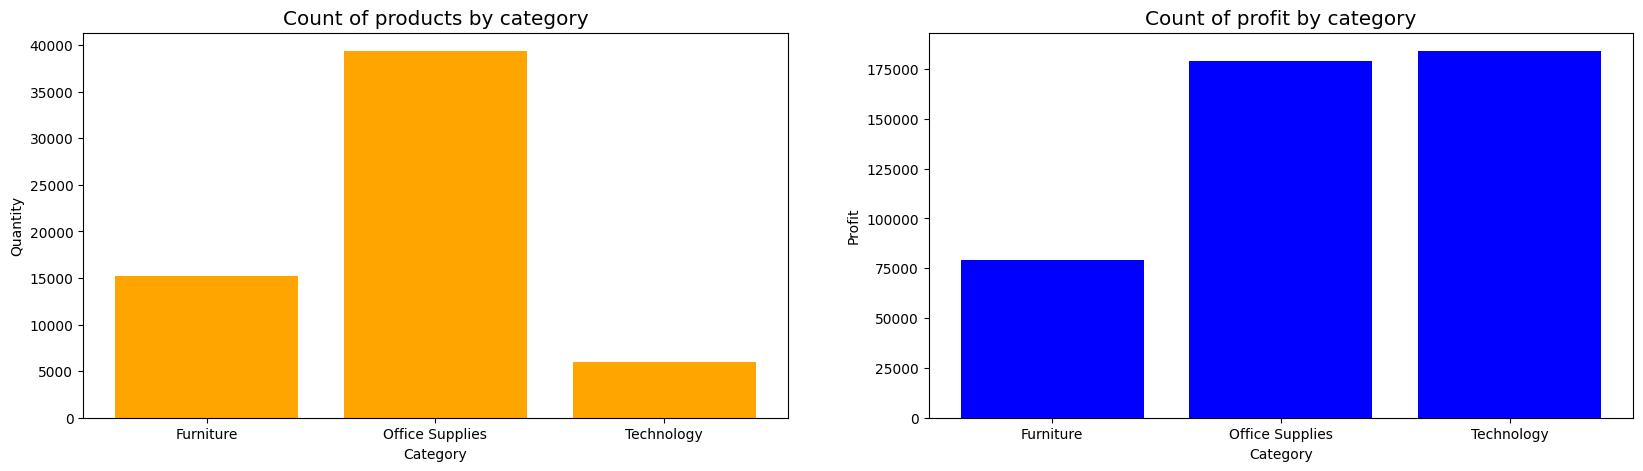

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
style.use('ggplot')
# Plot bar chart of quantity by category
axs[0].bar(Category, Quantity, color = 'orange')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Quantity')
axs[0].set_title('Count of products by category')

# Plot bar chart of profit by category
axs[1].bar(Category, Profit, color = 'Blue')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Profit')
axs[1].set_title('Count of profit by category')

# Display the plot
plt.show()

Plotting continuous scatter plot for sales and profit that will show the relation between these two subsets. In the below scatter plot we can see the relation between the sales and profit generated by the company as we can see the increase in sales also indicates increase in profit over the time.(Kahng, SungWoo, et al)

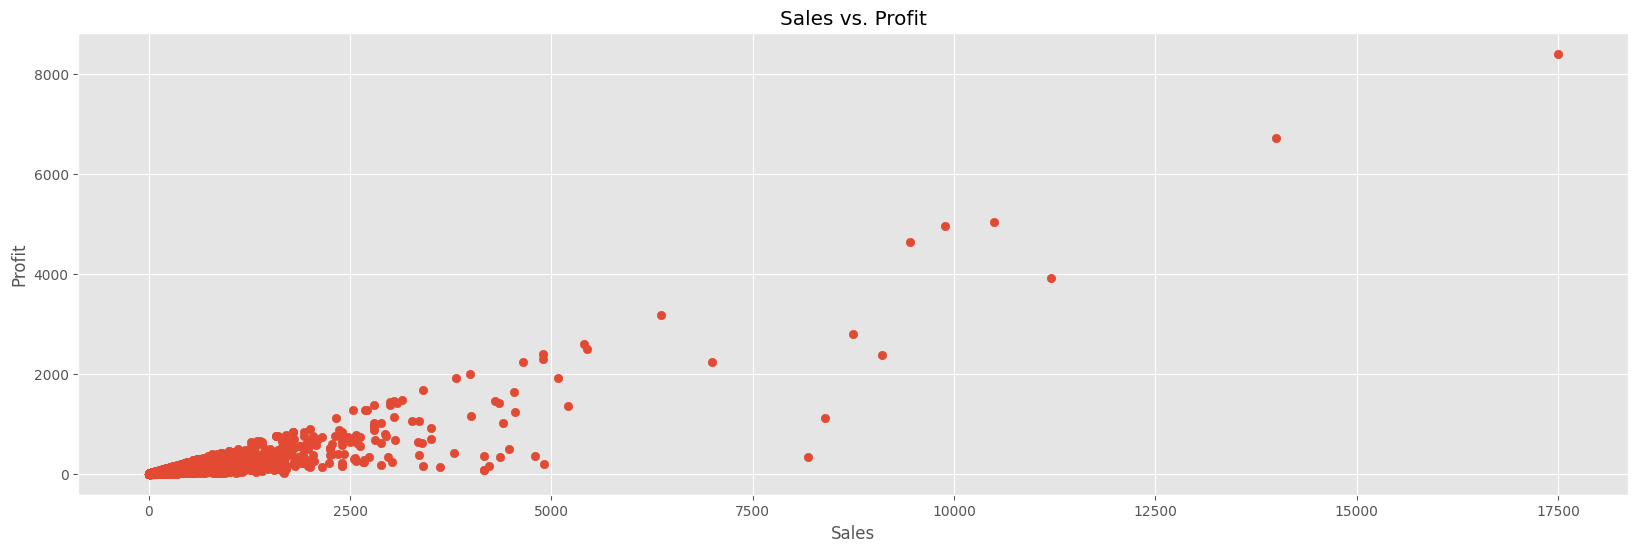

In [20]:
# Creating scatter plot for total sales and total profit
plt.figure(figsize=(20, 6))
plt.scatter(Superstorenew['Sales'], Superstorenew['Profit'])
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Here, we are plotting a heat map, this a two dimensional map representing  every feature in the dataset by different color. this show the feature who are correlated by 1and not correlated by -1 . Here we can see They are more positively associated the closer the correlation is to 1, meaning that if one increases, the other also increases, and the stronger the association, the closer the correlation is to 1 (Fernandez, Nicolas F., et al). Similarity exists when the correlation is closer to -1, yet one variable will decrease when the other grows rather than both increasing. Because the squares are perfectly correlated—that is, they are linking each variable to itself—the diagonals are all 1/dark purple. For the remaining variables, the higher the correlation between the two, the larger the number and the darker the hue. Since the same two variables are paired in those squares, the plot is symmetrical about the diagonal as well.

<Axes: >

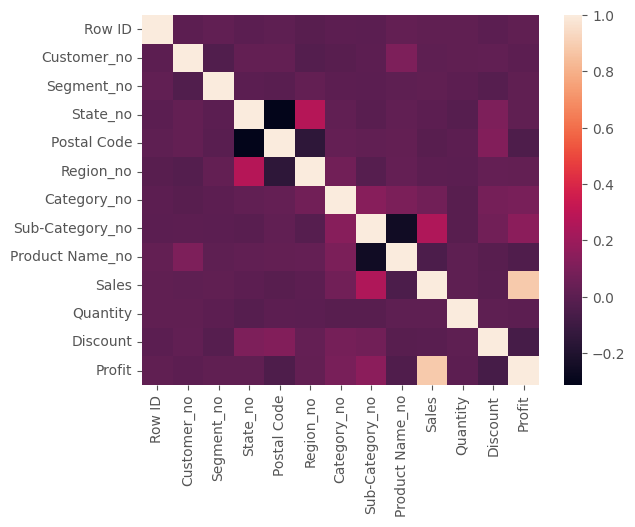

In [21]:
Superstorenew = Superstorenew.select_dtypes(include=[np.number])
sns.heatmap(Superstorenew.corr())

Now, to distinguish the factors that are mostly contributing in the profitability of the company. To do this we need perform a classification model. Here we are choosing linear regression model because it is more suitable to distinguish relation between dependent and independent variables (Idogho, J., and G. George). Here, we can see sales, quantity and discount is acted as Independent variables and profit as dependent variable.

In [22]:
# Modeling Strategy - Regression
# Perform linear regression to demonstrate factors contributing to profitability
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
X = Superstorenew[['Sales', 'Quantity', 'Discount']]  # Independent variables
y = Superstorenew['Profit']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets
reg_model = LinearRegression()  # Create a linear regression model
reg_model.fit(X_train, y_train)  # Fit the model to the training data
reg_predictions = reg_model.predict(X_test)  # Make predictions using the testing data
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, reg_predictions)
mse = mean_squared_error(y_test, reg_predictions)
rmse = mean_squared_error(y_test, reg_predictions, squared=False)
r2 = r2_score(y_test, reg_predictions)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 36.438273581230604
Mean Squared Error: 7232.143980134634
Root Mean Squared Error: 85.04201302964691
R-squared: 0.7614570243594863


Here is an analysis of the model's performance using the metrics we have provided:

1. Mean Absolute Error (MAE): There is an average absolute difference of roughly 36.43 between the actual and forecasted profit figures. This indicates that your model's forecasts are inaccurate by about 36.43 Pounds, on average.

2. Mean Squared Error (MSE): There is an approximate 7232.14 average squared difference between the actual and forecasted profit figures. Greater errors are penalized more severely by MSE than by MAE.

3. Root Mean Squared Error (RMSE): Approximately 85.04 is the square root of the MSE. Compared to MSE, RMSE offers a more comprehensible measure of error and is expressed in the same units as the goal variable (profit in this example).

4. R-squared (R2): The R-squared value is roughly 0.76, meaning that the independent variables in your model (Sales, Quantity, and Discount) can account for about 76% of the variance in the profit.(Colin Cameron, A., and Frank A. G. Windmeijer)

Conclusion

Overall, these findings imply that, given the provided features (Sales, Quantity, and Discount), your linear regression model has a limited ability to forecast the profit. There can be additional elements that have a big impact on earnings but are not included in your model. Furthermore to enhance the predictability performance we can perform analysis based on different features. At last, we can conclude that the company's profitability can be estimated by the given data as it shows the relationships between the various feature and to predict the profitability for the company in future.

References -

Jo, Han-Shin, et al. “Path Loss Prediction Based on Machine Learning Techniques: Principal Component Analysis, Artificial Neural Network, and Gaussian Process.” Sensors, vol. 20, no. 7, 30 Mar. 2020, p. 1927, https://doi.org/10.3390/s20071927. Accessed 26 June 2020.

Idogho, J., and G. George. “PATH LOSS PREDICTION BASED on MACHINE LEARNING TECHNIQUES: SUPPORT VECTOR MACHINE, ARTIFICIAL NEURAL NETWORK, and MULTILINEAR REGRESSION MODEL.” Open Journal of Physical Science (ISSN: 2734-2123), vol. 3, no. 2, 28 July 2022, pp. 1–22, https://doi.org/10.52417/ojps.v3i2.393.

Guttag, John V. Introduction to Computation and Programming Using Python, Second Edition: With Application to Understanding Data. Google Books, MIT Press, 12 Aug. 2016, books.google.co.uk/books?hl=en&lr=&id=KabKDAAAQBAJ&oi=fnd&pg=PR7&dq=subsetting+in+python&ots=EVxLP_QZbs&sig=NIklTdHAwNVV7Bie7q6pxCna4YY&redir_esc=y#v=onepage&q=subsetting%20in%20python&f=false. Accessed 17 Mar. 2024.

Tiwari, Manu, et al. “Road Accident Analysis Using ML Classification Algorithms and Plotting Black Spot Areas on Map.” Lecture Notes in Networks and Systems, 1 Jan. 2022, pp. 685–701, https://doi.org/10.1007/978-981-16-8721-1_64. Accessed 17 Mar. 2024.

Fernandez, Nicolas F., et al. “Clustergrammer, a Web-Based Heatmap Visualization and Analysis Tool for High-Dimensional Biological Data.” Scientific Data, vol. 4, no. 1, 10 Oct. 2017, https://doi.org/10.1038/sdata.2017.151.

Kahng, SungWoo, et al. “TEMPORAL DISTRIBUTIONS of PROBLEM BEHAVIOR BASED on SCATTER PLOT ANALYSIS.” Journal of Applied Behavior Analysis, vol. 31, no. 4, Dec. 1998, pp. 593–604, https://doi.org/10.1901/jaba.1998.31-593. Accessed 17 May 2020.

Colin Cameron, A., and Frank A. G. Windmeijer. “An R-Squared Measure of Goodness of Fit for Some Common Nonlinear Regression Models.” Journal of Econometrics, vol. 77, no. 2, 1 Apr. 1997, pp. 329–342, www.sciencedirect.com/science/article/abs/pii/S0304407696018180, https://doi.org/10.1016/S0304-4076(96)01818-0.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=737ceaf0-3fa9-4c4b-8d84-94b5c8f6b2ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>